# Coding Project 1 : Linear Regression and Regularization

**Please write the names of all group members here:**




---


*Note:* The provided structure for the code below is only suggestive, and if you want to structure your programs differently you may do so.

### Question 1 - Importing the Data

D'Agostino-Pearson normality test for non-transformed data: statistic=610.8359109472653, p-value=2.283848353787728e-133
Skewness: 1.8828757597682129
Skewness transformed data -0.008644001143304141
Kurtosis: 6.536281860064529
kurtosis transformed data 0.8707599064316245
Optimal λ for Box-Cox: -0.0769


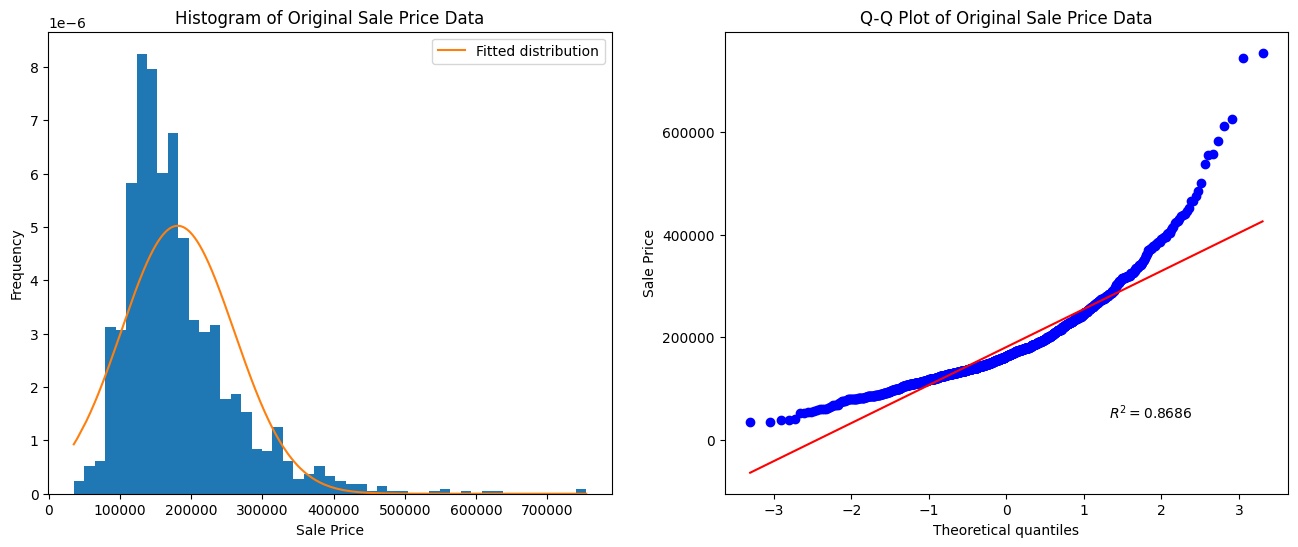

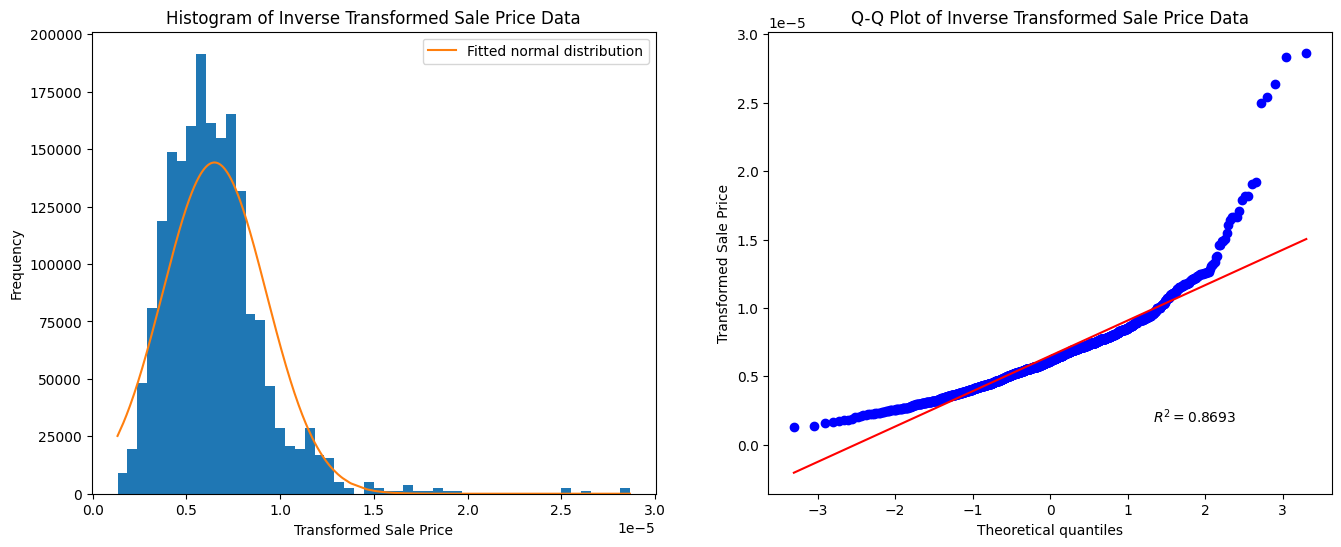

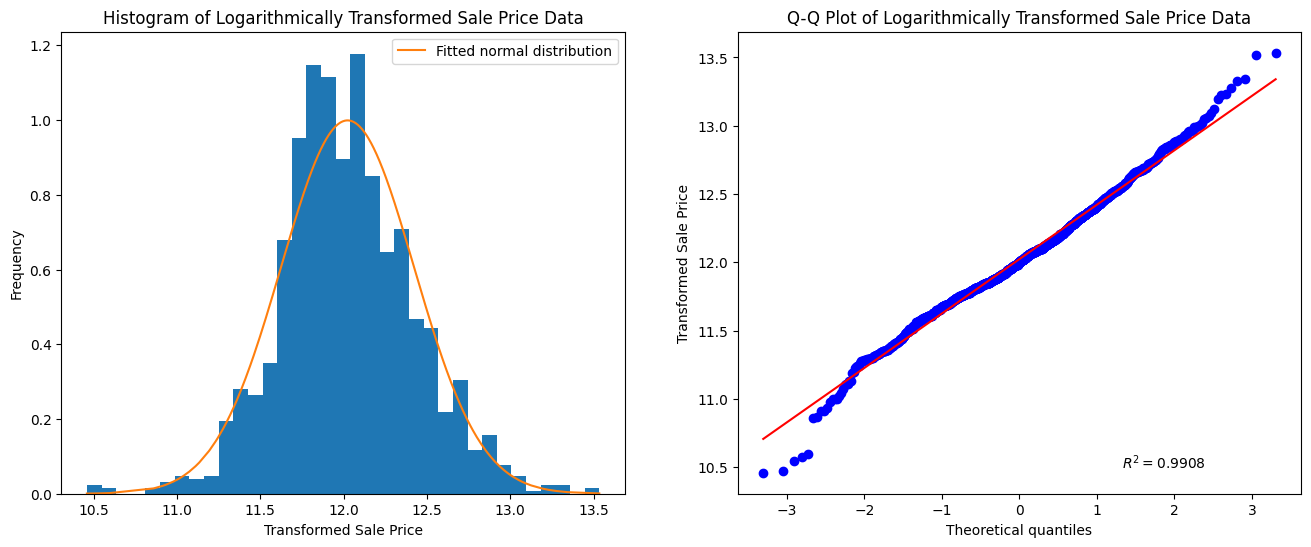

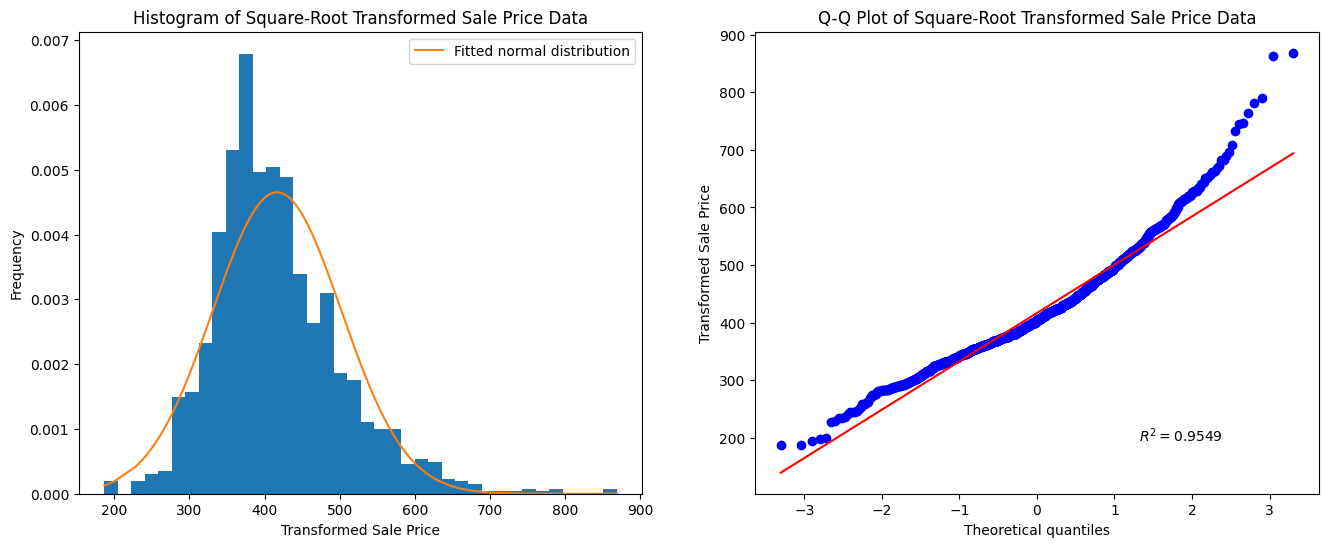

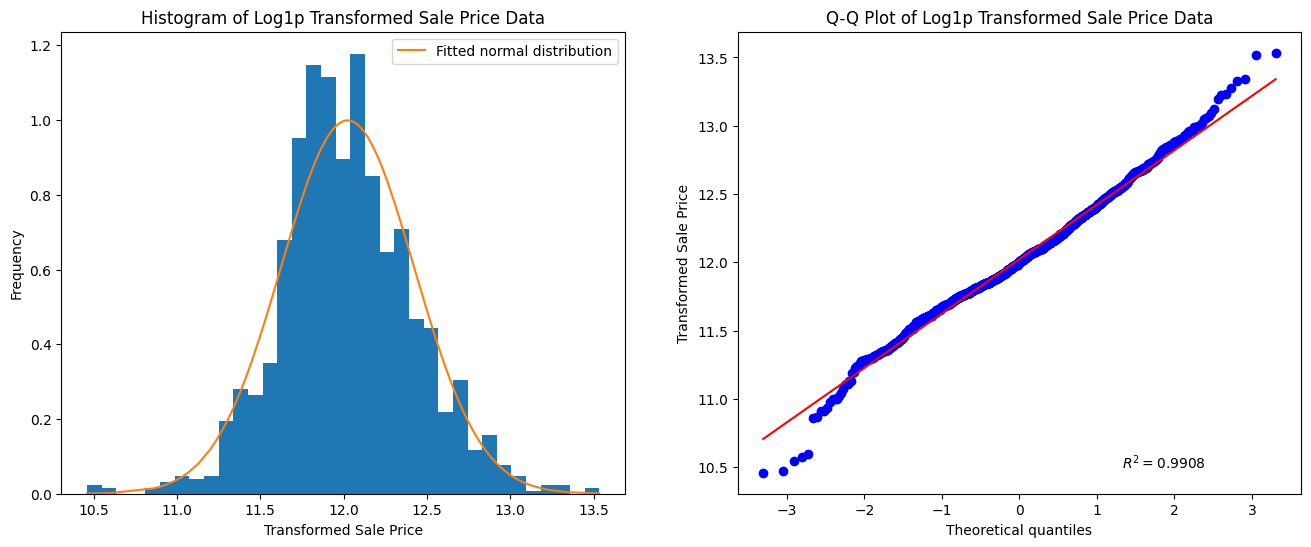

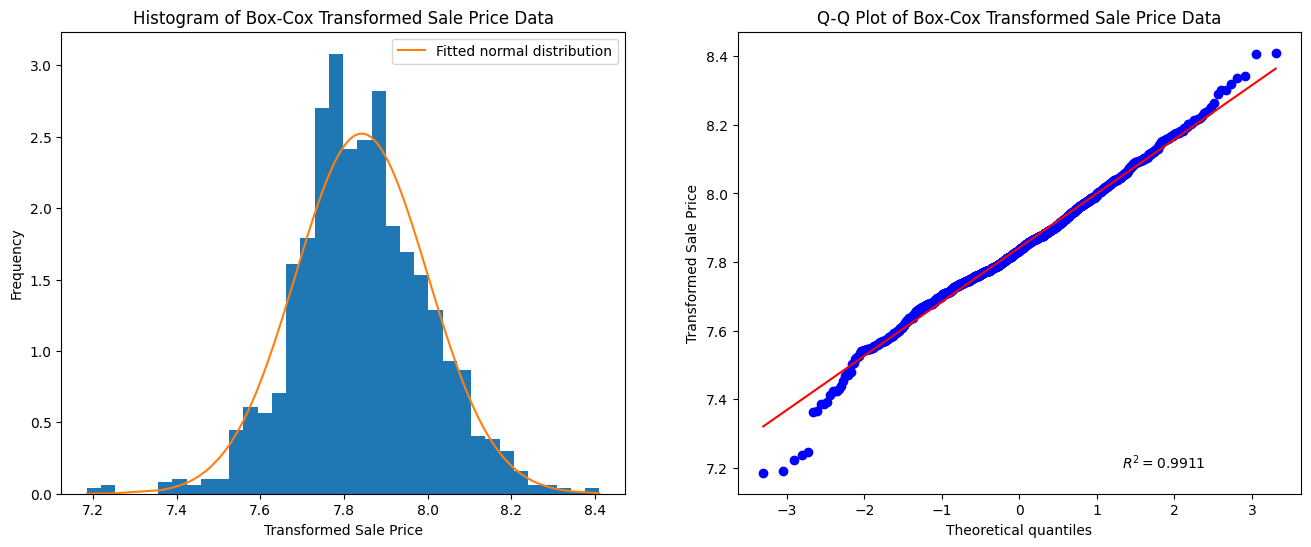

In [ ]:
#For Question 1, you can import the following packages:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection  import train_test_split

# Function to fit a normal distribution to data and and calculate pdf normal
def fit_norm_pdf(data):
    mean, std = stats.norm.fit(data)
    sorted_data = np.sort(data)
    pdf = stats.norm.pdf(sorted_data, mean, std)
    return mean, std, pdf


#1.a) Import the dataset Housing.csv into Python as a pandas DataFrame.
#To determine whether a variable is categorical or numerical, please refer to the file data_description.txt.
#Remember that the first column of the csv file is an index column and should not be considered as an explanatory variable.

## ADJUST THE FILE PATH ACCORDING TO YOUR FOLDER STRUCTURE ##
housing_data = pd.read_csv(""/home/nilsjohnson/Documents/ETH/MsC/Sem2/ML_F&I/project_1/"Housing.csv", index_col=0)

#1.b) Graphically determine whether the target variable SalePrice is approximately Gaussian.

sale_price_orig = housing_data['SalePrice']

# Perform D'Agostino-Pearson normality test
stat, p = stats.normaltest(housing_data['SalePrice'])

print(f"D'Agostino-Pearson normality test for non-transformed data: statistic={stat}, p-value={p}")

# Box-Cox transformation of SalePrice
sale_price_trans_boxcox, lmbda_sale_price = stats.boxcox(housing_data['SalePrice'])

# log1p transformation
sale_price_trans_log1p = np.log1p(sale_price_orig)

# inverse transformation
sale_price_trans_inv = 1 / sale_price_orig

#logarithmic transformation
sale_price_trans_log = np.log(sale_price_orig)

# square-root transformation
sale_price_trans_sqrt = np.sqrt(sale_price_orig)


skewness = sale_price_orig.skew()
print("Skewness:", skewness)
print("Skewness transformed data", stats.skew(sale_price_trans_boxcox))

kurtosis = sale_price_orig.kurt()
print("Kurtosis:", kurtosis)
print("kurtosis transformed data", stats.kurtosis(sale_price_trans_boxcox))

print(f"Optimal λ for Box-Cox: {lmbda_sale_price:.4f}")


sale_price_orig_np = np.array(sale_price_orig)
sale_price_orig_np.sort()
sale_price_trans_sorted = np.sort(sale_price_trans_boxcox)

mean_orig, std_orig = stats.norm.fit(sale_price_orig_np, loc=0)
mean_trans, std_trans = stats.norm.fit(sale_price_trans_sorted, loc=0)

pdf_norm_orig = stats.norm.pdf(sale_price_orig_np, mean_orig, std_orig)
pdf_norm_trans = stats.norm.pdf(sale_price_trans_sorted, mean_trans, std_trans)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# q-q plot original data
prob = stats.probplot(sale_price_orig, dist=stats.norm, plot=ax2, rvalue=True)

# histogram original data
ax1.hist(sale_price_orig_np, bins='auto', density = True)
ax1.plot(sale_price_orig_np, pdf_norm_orig, label='Fitted distribution')
ax1.set_title("Histogram of Original Sale Price Data")
ax1.set_xlabel("Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title('Q-Q Plot of Original Sale Price Data')
ax2.set_ylabel('Sale Price')

plt.show()



# inverse transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_inv, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_inv, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_inv), fit_norm_pdf(sale_price_trans_inv)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Inverse Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Inverse Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# logarithmic transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log), fit_norm_pdf(sale_price_trans_log)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Logarithmically Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Logarithmically Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# square-root transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_sqrt, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_sqrt, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_sqrt), fit_norm_pdf(sale_price_trans_sqrt)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Square-Root Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Square-Root Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# log1p transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_log1p, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_log1p, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_log1p), fit_norm_pdf(sale_price_trans_log1p)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Log1p Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Log1p Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()

# Box-Cox transformation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

prob = stats.probplot(sale_price_trans_boxcox, dist=stats.norm, plot=ax2, rvalue=True)

ax1.hist(sale_price_trans_boxcox, bins='auto', density = True)
ax1.plot(np.sort(sale_price_trans_boxcox), fit_norm_pdf(sale_price_trans_boxcox)[2], label='Fitted normal distribution')
ax1.set_title("Histogram of Box-Cox Transformed Sale Price Data")
ax1.set_xlabel("Transformed Sale Price")
ax1.set_ylabel("Frequency")
ax1.legend()

ax2.set_title(f'Q-Q Plot of Box-Cox Transformed Sale Price Data')
ax2.set_ylabel('Transformed Sale Price')

plt.show()



# Perform D'Agostino-Pearson normality test on transformed data
# stat_transformed, p_transformed = stats.normaltest(sale_price_trans)

# print(f"D'Agostino-Pearson normality test for transformed data: statistic={stat_transformed:.3f}, p-value={p_transformed:.3f}")


#If not, suggest a suitable transformation to bring SalePrice closer to a Gaussian distribution (logarithmic, inverse, square-root, ...).

# As we can see the histogram and q-q plot the original data is not gaussian normally distributed. The data clearly shows a lot of skewness, meaning the
# data is very asymmetric around it's mean. In particullar there is a strong prositive skew with a skewness factor of 1.88. The red line in the q-q plot
# indicates the theoretical quantiles of the reference distribution, which in our case is the normal distribution. The goal is therefore that all of
# the dots in the q-q plot lie along this line. 

#Do not forget to apply this transformation to the target variable SalePrice in the dataset.

#Why is it important to consider such potential transformations?

# In general, we can perform linear regression on data that is not normally distributed. What matters is that the residuals (errors) are 
# approximately normally distributed. If this assumption holds, then the OLS estimators are not only unbiased but also efficient
# (optimal under the Gauss–Markov theorem). Furthermore, normal residuals are especially important when performing statistical inference
# (e.g. t-tests, confidence intervals), because these tests rely on the normality of the error terms for their validity.


# Looking at the different transformations above, we can see that the Box-Cox transformation seems to perform best in terms of making the data
# more normally distributed. The skewness is reduced from 1.88 to 0.27 and the kurtosis from 6.54 to 0.98. The histogram also looks
# more symmetric and the q-q plot shows that the points lie closer to the red line, indicating that the transformed data is closer to a normal distribution.

sale_price_trans = sale_price_trans_log1p

#1.c) Split the data into a training set (X,y)_train and a test set (X,y)_test.
#Randomly assign 70% of the observations to the training set and the remaining 30% to the test set.

X = housing_data.drop(columns="SalePrice")
y = sale_price_trans


# Split data, use different random_stat integerst to check if the result is stable across different distinct random seeds
X_train, X_test, y_train_trans, y_test_trans = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#1.d) Replace missing values in X using the training data statistics only -> use .fillna(...)
#For numerical features, replace missing values with the mean of the column .
#For categorical features, replace missing values with the most frequent category.
#You can use the function df.select_dtypes(...) to idetify categorical variables as the variables with type 'object' and 'category'. 
#Some categorical variables admit NA (or None) as a valid category, which should be treated as an actual level and not as missing.

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Features where NA is a valid category
na_valid_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# Create new list where NA-valid features from categorical_features list is removed
impute_features = [col for col in categorical_features if col not in na_valid_features]

# replace missing values in X_train where necessary
X_train[impute_features] = X_train[impute_features].fillna(X_train[categorical_features].mode().iloc[0])
X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].mean())

# standardize all numerical features in X_train and X_test with z-score transformation
X_train[numerical_features] = (X_train[numerical_features] - X_train[numerical_features].mean()) / X_train[numerical_features].std()
X_test[numerical_features] = (X_test[numerical_features] - X_test[numerical_features].mean()) / X_test[numerical_features].std()


# one-hot encode categorical features in X_train
X_train = pd.get_dummies(X_train, dummy_na=True, columns=categorical_features, drop_first=True)

# one-hot encode categorical features in X_Test
X_test = pd.get_dummies(X_test, dummy_na=True, columns=categorical_features, drop_first=True)

# ensure that X_test has the same columns as X_train 
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)




### Question 2 - Linear Regression on Numerical Features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

#2.a) Fit a linear regression model on the training dataset with numerical features only using the sklearn package.
#Output a table with the name of each feature and the associated regression coefficient.

reg = LinearRegression().fit(X_train,y_train_trans)
print(reg.score(X_train, y_train_trans))
#Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2.



#2.b) (i) Compute the estimated coefficients for each explanatory variable using the numpy package. 
#Remember that the design matrix A needs to include a column of 1's. Use np.linalg.solve(...).

# (ii) Compute the standard error of each estimated coefficient using the numpy package.

# (iii) Compute the (in-sample) MSE and R^2 using the numpy package.

# (iv) Do the results change using pseudoinversion instead of standard matrix inversion? Use np.linalg.pinv(...).

# (v) Compare your results (with and without pseudoinversion) to the output of the sm.OLS(...) function.



0.9484727572030588


### Question 3 - Regularization Techniques

In [3]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

# 3.a) Linear regression with the full Housing dataset (numerical + categorical).
#How do the in-sample and out-of-sample metrics change when including categorical features, and what does this reveal about the model’s ability to generalize?


#3.b) Implement the Truncated Pseudoinverse, Ridge, Lasso, and Elastic Net regularization techniques.
#Use 8-fold cross-validation to tune the hyperparameters of each regularization technique based on the MSE metric.
#Why is it important that the intercept is not penalized in these models?

#Compare their performance in terms of in-sample and out-of-sample MSE and R2 with the linear regressions of Questions 2.a) and 3.a).


#3.c) During cross-validation, what are possible sources of information leakage? 
#Briefly describe what leakage means in this context, and explain what steps you would take to avoid it if you were building a more complete data preprocessing pipeline (e.g., with imputation, scaling, or encoding). 
#You do not need to implement these steps here, only to explain the idea.


#3.d) For the  Lasso and Elastic Net regressions, how many coefficients are non-zero?

#Compare this number with the number of coefficients retained by the Ridge and Truncated Pseudoinverse models and provide an explanation.


#3.e) #Based on your findings from Questions 2 and 3, which model would you recommend for predicting house prices? 
#Justify your choice not only by comparing performance metrics, but also by discussing the nature of the problem (e.g., number of features, presence of categorical variables, potential collinearity, sparsity, nonlinearity). 
#Explain how the strengths and limitations of the chosen method align with this problem structure.

